In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


In [9]:
#read diamond data
df = pd.read_csv(r'C:\Users\saiga\ML Project\diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326,3.95,3.98,2.43
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326,3.89,3.84,2.31
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327,4.05,4.07,2.31
3,0.29,b'Premium',b'I',b'VS2',62.4,58.0,334,4.20,4.23,2.63
4,0.31,b'Good',b'J',b'SI2',63.3,58.0,335,4.34,4.35,2.75


In [10]:
df = df.drop(['color', 'clarity', 'table', "x", "y", "z"], axis = 1)
df.head()

,carat,cut,depth,price
0,0.23,b'Ideal',61.5,326
1,0.21,b'Premium',59.8,326
2,0.23,b'Good',56.9,327
3,0.29,b'Premium',62.4,334
4,0.31,b'Good',63.3,335


In [11]:
le = LabelEncoder()
df['cut'] = le.fit_transform(df['cut'])
df.head()

,carat,cut,depth,price
0,0.23,2,61.5,326
1,0.21,3,59.8,326
2,0.23,1,56.9,327
3,0.29,3,62.4,334
4,0.31,1,63.3,335


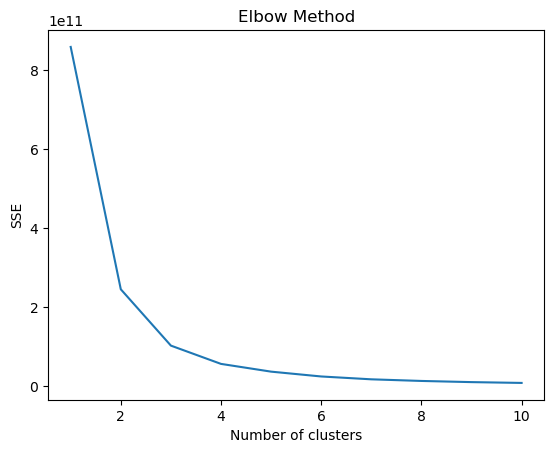

In [102]:
sse=[]
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    y_pred=kmeans.fit(df)
    sse.append(kmeans.inertia_)

# Plot SSE for each value of k
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=3, max_iter=1000)
y_pred=kmeans.fit(df)

In [13]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [14]:
labels


array([1, 1, 1, ..., 1, 1, 1])

In [15]:
centroids

array([[1.11772828e+00, 2.59824699e+00, 6.18156724e+01, 5.79875222e+03],
       [4.93136732e-01, 2.51541117e+00, 6.17361602e+01, 1.46287562e+03],
       [1.71865576e+00, 2.65078236e+00, 6.16470484e+01, 1.33655827e+04]])

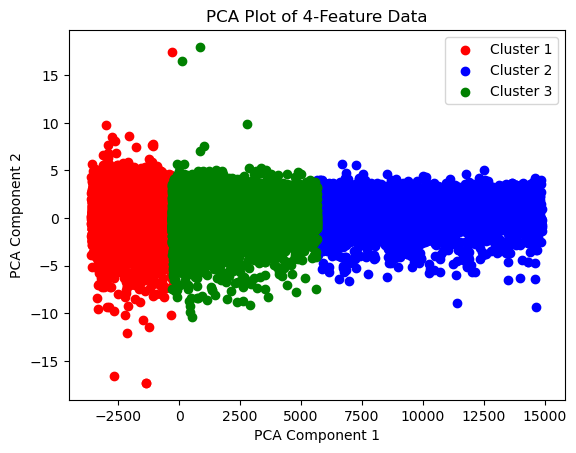

In [16]:
pca = PCA(n_components=2)
components = pca.fit_transform(df)
colors = ['red', 'blue', 'green']
labelnames = ['Cluster 1', 'Cluster 2', 'Cluster 3']

# Cluster the data using K-Means
kmeans = KMeans(n_clusters=3)
kmeans.fit(components)
fig, ax = plt.subplots()
for i in range(len(colors)):
    ax.scatter(components[kmeans.labels_ == i, 0], 
               components[kmeans.labels_ == i, 1], 
               c=colors[i], label=labelnames[i])
ax.set_title('PCA Plot of 4-Feature Data')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.legend()
plt.show()

In [18]:
# Perform clustering on the data
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(df)

# Evaluate the performance metrics
silhouette = silhouette_score(df, labels)
davies_bouldin = davies_bouldin_score(df, labels)
# Print the performance metrics
print("Silhouette Coefficient:", silhouette)
print("Davies-Bouldin Index:", davies_bouldin)

Silhouette Coefficient: 0.6602449985104807
Davies-Bouldin Index: 0.4812040639873619
